# MPC - TP FINAL - Nana et Oumaima

In [157]:
!pip install pandas
!pip install matplotlib
!pip install statsmodels
!pip install scikit-learn
!pip install seaborn

You should consider upgrading via the 'c:\users\nanaf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\nanaf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\nanaf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\nanaf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\nanaf\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
# Load the data pour prédire le prix de vente
houses_competition = pd.read_csv("./houses_competition.csv", index_col=0)
houses_competition.head()
# predictive variables (18)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15529,3,2.25,2140,9775,1.0,0.0,0.0,4,7,1470,670,1978,0.0,98023,47.3060,-122.379,2050,8625
3233,2,2.25,1240,1172,2.0,0.0,0.0,3,8,1000,240,2008,0.0,98144,47.5877,-122.316,1260,1111
14381,2,2.00,1730,4248,2.0,0.0,0.0,3,7,1730,0,1905,0.0,98144,47.5933,-122.308,1380,4000
3201,4,4.25,4883,26040,2.0,0.0,3.0,3,10,3859,1024,2006,0.0,98092,47.2630,-122.216,3736,9870
3425,4,2.50,1910,5000,2.0,0.0,0.0,3,7,1910,0,2005,0.0,98038,47.3608,-122.036,2020,5000


In [160]:
# Load the data pour prédire le prix de vente
houses = pd.read_csv("./houses.csv", index_col=0)
houses.head()
# price is the target variable, the other are predictive variables (18)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6681,3.500,3,2.25,1860,8378,2.0,0.0,0.0,3,7,1860,0,1995,0.0,98038,47.3875,-122.032,1870,8378
17798,5.925,4,3.00,2170,8240,1.0,0.0,0.0,4,8,1370,800,1968,0.0,98052,47.6291,-122.093,2020,7944
18854,2.555,2,1.00,1440,43560,1.0,0.0,0.0,4,7,1150,290,1965,0.0,98027,47.4916,-122.082,1870,56628
13478,13.300,4,2.25,3260,4640,2.0,0.0,0.0,5,9,2360,900,1907,0.0,98112,47.6272,-122.312,3240,5800
10509,3.891,2,1.00,840,5400,1.0,0.0,0.0,4,7,840,0,1948,0.0,98118,47.5489,-122.271,1340,5400


# First part : Predicting house prices

1) Une étude statistique rapide sur l'ensemble de données : variables prédictives, variable cible, lien entre les variables.

In [143]:
houses.shape

(13397, 19)

In [144]:
# Statistiques descriptives du fichier houses
houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,13397.000000,13397.000000,13397.000000,13397.000000,1.339700e+04,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,5.411905,3.379861,2.122509,2085.261775,1.525303e+04,1.495185,0.006867,0.225648,3.412406,7.662312,1792.022542,293.030604,1971.132642,83.006494,98077.574756,47.559242,-122.213414,1987.884750,12774.004180
std,3.727862,0.938934,0.764619,919.172404,3.973164e+04,0.539493,0.082587,0.752068,0.652101,1.168484,827.231993,443.115894,29.360525,398.562717,53.391212,0.138897,0.140730,680.418605,25855.329281
min,0.820000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.220000,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.469300,-122.328000,1490.000000,5100.000000
50%,4.500000,3.000000,2.250000,1920.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1564.000000,0.000000,1975.000000,0.000000,98065.000000,47.571500,-122.229000,1840.000000,7620.000000
75%,6.440000,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.677500,-122.123000,2360.000000,10091.000000
max,77.000000,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,434728.000000


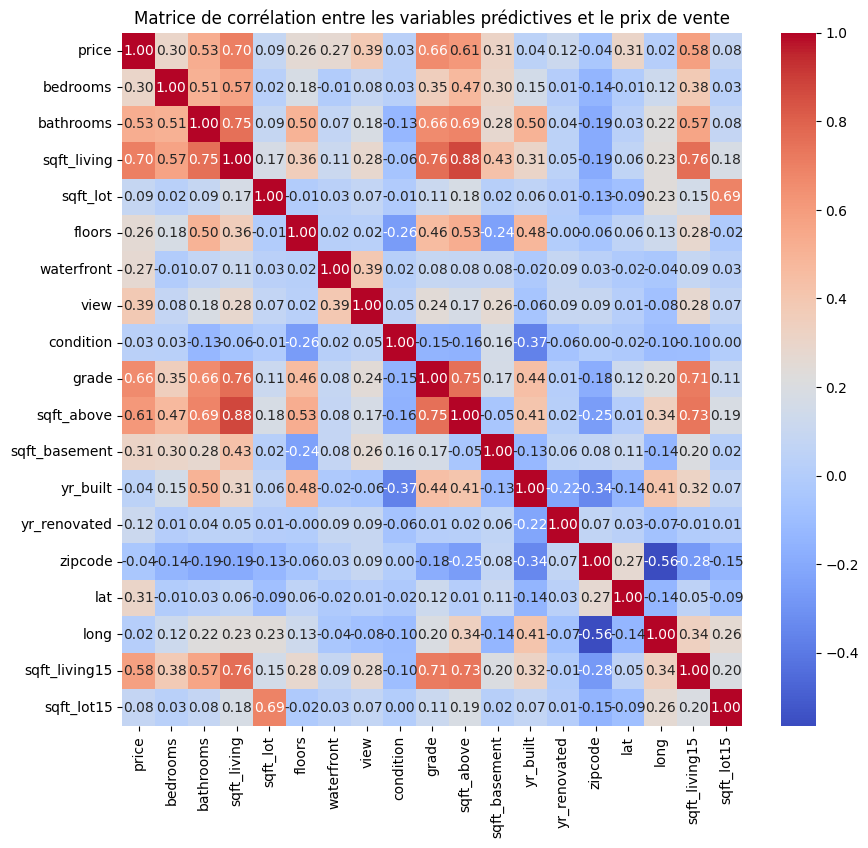

In [145]:
# Calculer la matrice de corrélation
matrice_correlation = houses.corr()

# Visualiser la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les variables prédictives et le prix de vente")
plt.show()
df_correlation = pd.DataFrame(matrice_correlation)

# Spécifier le chemin du fichier de sortie
chemin_fichier = "matrice_correlation.csv"

# Enregistrer le DataFrame dans un fichier CSV
df_correlation.to_csv(chemin_fichier)

2) Modèles de régression simples : vous ne pouvez utiliser qu'une seule variable prédictive parmi 18. Il vous est demandé de choisir la meilleure et d'évaluer son erreur de généralisation.

In [146]:
# Étape 1 : Analyse de corrélation
correlation_with_price = houses.corr()['price'].abs().sort_values(ascending=False)
best_predictive_variable = correlation_with_price.index[1]  # Exclure 'price' lui-même

# Étape 2 : Modèles de régression simple
X = houses[[best_predictive_variable]]  # Meilleure variable prédictive
y = houses['price']

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuster un modèle de régression linéaire simple
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire sur l'ensemble de validation
y_pred = model.predict(X_val)

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Étape 3 : Sélectionner le meilleur modèle
print(f"Best Predictive Variable: {best_predictive_variable}")

Mean Squared Error: 7.08930365375941
Best Predictive Variable: sqft_living


In [147]:
# Sélectionner la colonne sqft_living comme variable prédictive
X = houses['sqft_living']
X = sm.add_constant(X)
Y = houses['price']
model = sm.OLS(Y, X).fit()
print(model.summary())

a = model.params['const']  # Constante (intercept)
b = model.params['sqft_living']  # Coefficient de la variable prédictive (pente)
print("a (intercept) :", a)
print("b (coefficient de sqft_living) :", b)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.320e+04
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:48:00   Log-Likelihood:                -32042.
No. Observations:               13397   AIC:                         6.409e+04
Df Residuals:                   13395   BIC:                         6.410e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5466      0.057     -9.646      

In [148]:
X = houses[['sqft_living']]  # Best predictive variable
y = houses['price']

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict on the competition dataset
competition_pred = model.predict(houses_competition[['sqft_living']])

# Create a DataFrame with ID and predicted prices
submission_df = pd.DataFrame({'ID': houses_competition.index, 'Price': competition_pred})

# Save the predictions to a CSV file
submission_df.to_csv('my_submission.csv', index=False)

3) Régression multiple : utilisez les 18 variables pour prédire le prix de vente. Estimez l’erreur de généralisation de ce modèle.

In [149]:
# Step 1: Split the Data
X = houses.drop(columns=['price'])  # Predictive variables
y = houses['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Evaluate the Model
# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can also calculate R-squared
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

Mean Squared Error: 4.281346073143395
R-squared: 0.692433873865064


In [150]:
# Step 1: Split the Data
X_train = houses.drop(columns=['price'])  # Predictive variables
y_train = houses['price']  # Target variable

# Step 2: Fit the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict on the competition dataset
competition_pred = model.predict(houses_competition)

# Create a DataFrame with ID and predicted prices
submission_df = pd.DataFrame({'ID': houses_competition.index, 'Price': competition_pred})

# Save the predictions to a CSV file
submission_df.to_csv('my_submission3.csv', index=False)

4) Sélection de variables : appliquer les différentes techniques de sélection de variables vues au cours pour sélectionner des modèles intéressants. Pouvez-vous trouver de meilleurs modèles qu’avant ? (selon l'estimation de l'erreur de généralisation)

In [151]:
def step_selection_adj(train, v_s, v_nu, idx_t):
    """
    Perform one step of forward feature selection using adjusted R^2 as the performance criterion.

    Parameters:
        train (DataFrame): The training set.
        v_s (numpy array): The set of already selected variables (by index).
        v_nu (numpy array): The set of non-already used variables (by index).
        idx_t (int): The index of the target variable in the data set.

    Returns:
        best_variable (int): The index of the best variable to add to v_s.
    """
    best_variable = None
    best_adj_r_squared = -np.inf

    for var in v_nu:
        # Create a model with variables from v_s and var
        selected_vars = np.append(v_s, var)
        X_train = train.iloc[:, selected_vars]
        X_train = sm.add_constant(X_train)
        y_train = train.iloc[:, idx_t]
        model = sm.OLS(y_train, X_train).fit()

        # Compute adjusted R^2
        adj_r_squared = model.rsquared_adj

        # Update best variable if adjusted R^2 is higher
        if adj_r_squared > best_adj_r_squared:
            best_adj_r_squared = adj_r_squared
            best_variable = var

    return best_variable


In [152]:
def forward_selection_adj(train, idx_p, idx_t):
    """
    Perform forward variable selection with adjusted R^2 as performance criterion and strict stopping criterion.

    Parameters:
        train (DataFrame): The training set.
        idx_p (list): List of column indices of the predictive variables.
        idx_t (int): Column index of the target variable.

    Returns:
        best_subset (list): List of column indices of the best subset of variables.
    """
    v_s = []  # Set of already selected variables
    v_nu = idx_p.copy()  # Set of non-already used variables

    best_subset = []  # Best subset of variables
    best_adj_r_squared = -np.inf  # Best adjusted R^2

    while v_nu:
        # Perform one step of forward feature selection
        best_variable = step_selection_adj(train, v_s, v_nu, idx_t)
        v_s.append(best_variable)
        v_nu.remove(best_variable)

        # Create model with the current subset of variables
        X_train = train.iloc[:, v_s]
        X_train = sm.add_constant(X_train)
        y_train = train.iloc[:, idx_t]
        model = sm.OLS(y_train, X_train).fit()

        # Compute adjusted R^2
        adj_r_squared = model.rsquared_adj

        # Update best subset and adjusted R^2 if improved
        if adj_r_squared > best_adj_r_squared:
            best_subset = v_s.copy()
            best_adj_r_squared = adj_r_squared
        else:
            break  # Stop if performance decreases

    return best_subset


In [153]:
def evaluate_subset(train_subset, val_subset, subset_idx, target_idx):
    """
    Train a model using the subset of variables and evaluate its performance on the validation set.

    Parameters:
        train_subset (DataFrame): Subset of training data for model training.
        val_subset (DataFrame): Subset of validation data for model evaluation.
        subset_idx (list): List of column indices of the subset of variables.
        target_idx (int): Index of the target variable in the data set.

    Returns:
        mse (float): Mean squared error of the model on the validation set.
    """
    # Create model using the subset of variables
    X_train = train_subset.iloc[:, subset_idx]
    X_train = sm.add_constant(X_train)
    y_train = train_subset.iloc[:, target_idx]
    model = sm.OLS(y_train, X_train).fit()

    # Evaluate model performance on validation set
    X_val = val_subset.iloc[:, subset_idx]
    X_val = sm.add_constant(X_val)
    y_val = val_subset.iloc[:, target_idx]
    predictions_val = model.predict(X_val)
    mse = mean_squared_error(y_val, predictions_val)

    return mse


In [154]:
def forward_selection(train, idx_p, idx_t):
    """
    Perform forward variable selection with estimation of generalization error as performance criterion.

    Parameters:
        train (DataFrame): The training set.
        idx_p (list): List of column indices of the predictive variables.
        idx_t (int): Column index of the target variable.

    Returns:
        best_subset (list): List of column indices of the best subset of variables.
    """
    # Split the training set into training and validation subsets
    train_subset, val_subset = train_test_split(train, test_size=0.25, random_state=42)

    v_s = []  # Set of already selected variables
    v_nu = idx_p.copy()  # Set of non-already used variables

    best_subset = []  # Best subset of variables
    best_mse = float('inf')  # Best MSE

    while v_nu:
        # Perform one step of forward feature selection
        best_variable = None
        for var in v_nu:
            subset_idx = v_s + [var]
            mse = evaluate_subset(train_subset, val_subset, subset_idx, idx_t)
           # print(f"Subset: {subset_idx}, MSE: {mse}")
            if mse < best_mse:
                best_mse = mse
                best_variable = var

        # Update selected variables and non-selected variables
        if best_variable is not None:
            v_s.append(best_variable)
            v_nu.remove(best_variable)
            best_subset = v_s.copy()  # Update best subset
        else:
            break  # Stop if no improvement in MSE

    return best_subset


In [155]:
def forward_variable_selection(train, idx_p, idx_t, alpha=0.05):
    X = train.iloc[:, idx_p]  # Variables prédictives
    y = train.iloc[:, idx_t]  # Variable cible
    selected_vars_idx = []  # Liste des indices des variables sélectionnées
    remaining_vars_idx = list(range(len(idx_p)))  # Liste des indices des variables restantes
    
    while len(remaining_vars_idx) > 0:
        best_pvalue = float('inf')
        best_var_idx = None
        
        for var_idx in remaining_vars_idx:
            # Ajout de la variable sélectionnée aux variables existantes
            predictors_idx = selected_vars_idx + [var_idx]
            X_subset = sm.add_constant(X.iloc[:, predictors_idx])
            
            # Fit du modèle linéaire
            model = sm.OLS(y, X_subset).fit()
            
            # Calcul du p-value du dernier coefficient (la variable ajoutée)
            pvalue = model.pvalues[-1]
            
            # Vérification si le p-value est le plus petit
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_var_idx = var_idx
        
        # Vérification de la significativité
        if best_pvalue < alpha:
            selected_vars_idx.append(best_var_idx)
            remaining_vars_idx.remove(best_var_idx)
        else:
            break
    
    return selected_vars_idx

In [156]:
# Apply forward_selection_adj function
best_subset_adj_r_squared = forward_selection_adj(houses, list(range(1, len(houses.columns))), 0)

# Print the best subset of variables selected using adjusted R^2 criterion
print("Best subset of variables selected using adjusted R^2 criterion:                     ", best_subset_adj_r_squared)

# Apply forward_selection function
best_subset_generalization_error = forward_selection(houses, list(range(1, len(houses.columns))), 0)

# Print the best subset of variables selected using estimation of generalization error
print("Best subset of variables selected using estimation of generalization error:         ", best_subset_generalization_error)

# Apply forward_selection_student function
best_subset_student_test = forward_variable_selection(houses, list(range(1, len(houses.columns))), 0)

# Print the best subset of variables selected using critical probability of the Student’s test
print("Best subset of variables selected using critical probability of the Student’s test: ", best_subset_student_test)



Best subset of variables selected using adjusted R^2 criterion:                      [3, 15, 6, 9, 12, 7, 1, 2, 14, 16, 10, 8, 13, 17, 18]
Best subset of variables selected using estimation of generalization error:          [3, 15, 7, 9, 12, 6, 1, 2, 14, 16, 10, 8, 13, 18, 4]


C:\Users\nanaf\AppData\Local\Temp\ipykernel_60012\4283785848.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = model.pvalues[-1]
C:\Users\nanaf\AppData\Local\Temp\ipykernel_60012\4283785848.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = model.pvalues[-1]
C:\Users\nanaf\AppData\Local\Temp\ipykernel_60012\4283785848.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = model.pvalues[-1]
C:\Users\nana

Best subset of variables selected using critical probability of the Student’s test:  [1, 2, 14, 5, 8, 11, 6, 0, 13, 15, 9, 7, 12, 16, 17]


In [107]:
# Assuming houses is your DataFrame containing the data

# Define a function to calculate the final model and MSE
def calculate_final_model(train, test, subset, target_idx):
    X_train = sm.add_constant(train.iloc[:, subset])
    y_train = train.iloc[:, target_idx]
    model = sm.OLS(y_train, X_train).fit()

    X_test = sm.add_constant(test.iloc[:, subset])
    y_test = test.iloc[:, target_idx]
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    return mse

# Split the data into training and test sets
train_set, test_set = train_test_split(houses, test_size=0.2, random_state=42)

# Calculate MSE for forward_selection_adj
mse_adj = calculate_final_model(train_set, test_set, best_subset_adj_r_squared, 0)
print("Mean Squared Error for adjusted R^2 criterion:            ", mse_adj)

# Calculate MSE for forward_selection
mse_generalization_error = calculate_final_model(train_set, test_set, best_subset_generalization_error, 0)
print("Mean Squared Error for estimation of generalization error:", mse_generalization_error)

mse_student = calculate_final_model(train_set, test_set,best_subset_student_test,0)
print("MSE student:                                              ",mse_student)


Mean Squared Error for adjusted R^2 criterion:             4.280961282224654
Mean Squared Error for estimation of generalization error: 4.284809136343606
MSE student:                                               9.726347460708267e-25


Adjusted R-squared

In [108]:
def step_selection_backward_adj(train, v_s, idx_t):
    """
    Perform one step of backward feature selection using adjusted R^2 as the performance criterion.

    Parameters:
        train (DataFrame): The training set.
        v_s (numpy array): The set of already selected variables (by index).
        idx_t (int): The index of the target variable in the data set.

    Returns:
        best_variable (int): The index of the best variable to remove from v_s.
    """
    best_variable = None
    best_adj_r_squared = -np.inf

    for var in v_s:
        # Create a model without the variable var
        selected_vars = [v for v in v_s if v != var]
        X_train = train.iloc[:, selected_vars]
        X_train = sm.add_constant(X_train)
        y_train = train.iloc[:, idx_t]
        model = sm.OLS(y_train, X_train).fit()

        # Compute adjusted R^2
        adj_r_squared = model.rsquared_adj

        # Update best variable if adjusted R^2 is higher
        if adj_r_squared > best_adj_r_squared:
            best_adj_r_squared = adj_r_squared
            best_variable = var

    return best_variable

def backward_selection_adj(train, idx_p, idx_t):
    """
    Perform backward variable selection with adjusted R^2 as performance criterion.

    Parameters:
        train (DataFrame): The training set.
        idx_p (list): List of column indices of the predictive variables.
        idx_t (int): Column index of the target variable.

    Returns:
        best_subset (list): List of column indices of the best subset of variables.
    """
    v_s = idx_p.copy()  # Set of initially selected variables

    best_subset = idx_p.copy()  # Best subset of variables
    best_adj_r_squared = -np.inf  # Best adjusted R^2

    while len(v_s) > 1:
        # Perform one step of backward feature selection
        variable_to_remove = step_selection_backward_adj(train, v_s, idx_t)
        v_s.remove(variable_to_remove)

        # Create model with the current subset of variables
        X_train = train.iloc[:, v_s]
        X_train = sm.add_constant(X_train)
        y_train = train.iloc[:, idx_t]
        model = sm.OLS(y_train, X_train).fit()

        # Compute adjusted R^2
        adj_r_squared = model.rsquared_adj

        # Update best subset and adjusted R^2 if improved
        if adj_r_squared > best_adj_r_squared:
            best_subset = v_s.copy()
            best_adj_r_squared = adj_r_squared
        else:
            break  # Stop if performance decreases

    return best_subset


Generalization error

In [109]:
def backward_selection(train, idx_p, idx_t):
    """
    Perform backward variable selection with estimation of generalization error as performance criterion.

    Parameters:
        train (DataFrame): The training set.
        idx_p (list): List of column indices of the predictive variables.
        idx_t (int): Column index of the target variable.

    Returns:
        best_subset (list): List of column indices of the best subset of variables.
    """
    # Split the training set into training and validation subsets
    train_subset, val_subset = train_test_split(train, test_size=0.25, random_state=42)

    v_s = idx_p.copy()  # Set of initially selected variables

    best_subset = idx_p.copy()  # Best subset of variables
    best_mse = float('inf')  # Best MSE

    while len(v_s) > 1:
        # Perform one step of backward feature selection
        variable_to_remove = None
        for var in v_s:
            subset_idx = [v for v in v_s if v != var]
            mse = evaluate_subset(train_subset, val_subset, subset_idx, idx_t)
            if mse < best_mse:
                best_mse = mse
                variable_to_remove = var

        # Update selected variables and non-selected variables
        if variable_to_remove is not None:
            v_s.remove(variable_to_remove)
            best_subset = v_s.copy()  # Update best subset
        else:
            break  # Stop if no improvement in MSE

    return best_subset


In [110]:
def backward_variable_selection(train, idx_p, idx_t, alpha=0.05):
    X = train.iloc[:, idx_p]  # Variables prédictives
    y = train.iloc[:, idx_t]  # Variable cible
    selected_vars_idx = list(range(len(idx_p)))  # Liste des indices des variables sélectionnées
    remaining_vars_idx = list(range(len(idx_p)))  # Liste des indices des variables restantes
    
    while len(selected_vars_idx) > 0:
        best_pvalue = float('inf')
        worst_var_idx = None
        
        for var_idx in selected_vars_idx:
            # Retrait de la variable sélectionnée
            predictors_idx = selected_vars_idx[:]
            predictors_idx.remove(var_idx)
            X_subset = sm.add_constant(X.iloc[:, predictors_idx])
            
            # Fit du modèle linéaire
            model = sm.OLS(y, X_subset).fit()
            
            # Calcul du p-value du coefficient retiré
            pvalue = model.pvalues[var_idx]
            
            # Vérification si le p-value est le plus petit
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                worst_var_idx = var_idx
        
        # Vérification de la significativité
        if best_pvalue > alpha:
            selected_vars_idx.remove(worst_var_idx)
        else:
            break
    
    return selected_vars_idx

In [111]:
# Apply backward_selection_adj function
best_subset_backward_adj = backward_selection_adj(houses, list(range(1, len(houses.columns))), 0)

# Print the best subset of variables selected using backward selection with adjusted R^2 criterion
print("Best subset of variables selected using backward selection with adjusted R^2 criterion:", best_subset_backward_adj)

# Apply backward_selection function
best_subset_backward_generalization_error = backward_selection(houses, list(range(1, len(houses.columns))), 0)

# Print the best subset of variables selected using backward selection with estimation of generalization error
print("Best subset of variables selected using backward select with estimat of generali error:", best_subset_backward_generalization_error)

best_subset_backward_student = backward_variable_selection(houses, list(range(1, len(houses.columns))), 0)
print("Best subset of variables selected using backward select with student:                  ",best_subset_backward_student )

# Calculate MSE for backward_selection_adj
mse_backward_adj = calculate_final_model(train_set, test_set, best_subset_backward_adj, 0)
print("MSE for backward selection with adjusted R^2 criterion:  ", mse_backward_adj)

# Calculate MSE for backward_selection
mse_backward_generalization_error = calculate_final_model(train_set, test_set, best_subset_backward_generalization_error, 0)
print("MSE for backward selection with estimat of general error:", mse_backward_generalization_error)

mse_backward_student = calculate_final_model(train_set, test_set, best_subset_backward_student, 0)
print("MSE for backward selection with student:                 ",mse_backward_student )


Best subset of variables selected using backward selection with adjusted R^2 criterion: [1, 2, 3, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]
Best subset of variables selected using backward select with estimat of generali error: [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18]


C:\Users\nanaf\AppData\Local\Temp\ipykernel_60012\1890766304.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = model.pvalues[var_idx]
C:\Users\nanaf\AppData\Local\Temp\ipykernel_60012\1890766304.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = model.pvalues[var_idx]
C:\Users\nanaf\AppData\Local\Temp\ipykernel_60012\1890766304.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = model.pvalues[var_idx

Best subset of variables selected using backward select with student:                   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
MSE for backward selection with adjusted R^2 criterion:   4.280961282225109
MSE for backward selection with estimat of general error: 4.2848091363458645
MSE for backward selection with student:                  1.467294099226989e-23


In [112]:
def my_predictions(model, competition_data):
    # Obtenez les noms des colonnes du modèle
    model_columns = model.params.index[1:]
    
    # Obtenez les indices des colonnes correspondantes dans le DataFrame competition_data
    competition_columns = [list(competition_data.columns).index(col) for col in model_columns]
    
    # Sélectionnez les colonnes dans le DataFrame competition_data
    X_competition = competition_data.iloc[:, competition_columns]
    
    # Ajoutez la constante au DataFrame X_competition
    X_competition = sm.add_constant(X_competition)
    
    # Faites les prédictions
    predictions = model.predict(X_competition)
    
    return predictions



# Apply backward_selection_adj function
best_subset_backward_adj = backward_selection_adj(houses, list(range(1, len(houses.columns))), 0)

# Print the best subset of variables selected using backward selection with adjusted R^2 criterion
print("Best subset of variables selected using backward selection with adjusted R^2 criterion:", best_subset_backward_adj)

# Train the model with the selected subset of variables
X_train_subset = houses.iloc[:, best_subset_backward_adj]
X_train_subset = sm.add_constant(X_train_subset)
y_train = houses.iloc[:, 0]  # Assuming the first column is the target variable
model_backward_adj = sm.OLS(y_train, X_train_subset).fit()

# Make predictions for the competition data
predictions_backward_adj = my_predictions(model_backward_adj, houses_competition)

# Create a DataFrame with the predictions
pred = pd.DataFrame({'ID': houses_competition.index, 'Price': predictions_backward_adj})

# Save the predictions to a CSV file
pred.to_csv('my_submission_backward_adj.csv', index=False)

Best subset of variables selected using backward selection with adjusted R^2 criterion: [1, 2, 3, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]


5) Modèles non linéaires : ajoutez quelques variables non linéaires (que vous pouvez coupler avec des techniques de sélection de variables) pour tenter de concevoir des modèles plus précis.

In [113]:
# Split the data into training and test sets
train_sets, test_sets = train_test_split(houses, test_size=0.2, random_state=42)

In [114]:
def add_polynomial_feature(data, idx_p, power):
    new_data = data.copy(deep = True)
    for i in range(0, len(idx_p)):
        for j in power:
            for k in range(2, j+1):
                new_data['{}_pow_{}'.format(new_data.columns[idx_p[i]],k)] = new_data.iloc[:,idx_p[i]]**k
    return(new_data)

In [115]:
train_poly = add_polynomial_feature(train_sets, [3,9,10], [2])
train_poly
# You can see a new column with values of sqft_living	


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_pow_2,grade_pow_2,sqft_above_pow_2
20822,12.800,6,5.25,6160,27490,2.0,0.0,0.0,3,11,...,2007,0.0,98074,47.6094,-122.023,4225,9100,37945600,121,16321600
14182,4.736,4,1.50,1780,8400,1.0,0.0,0.0,3,7,...,1969,0.0,98136,47.5173,-122.385,1660,8400,3168400,49,1166400
19024,6.800,3,1.75,2330,9652,1.0,0.0,0.0,4,8,...,1968,0.0,98040,47.5714,-122.211,2420,9631,5428900,64,2528100
15580,11.200,5,1.50,2540,6660,2.0,0.0,3.0,4,8,...,1954,0.0,98136,47.5144,-122.393,2460,9000,6451600,64,5475600
9997,4.180,4,1.50,1220,10580,1.0,0.0,0.0,3,7,...,1965,0.0,98008,47.6205,-122.116,1350,7800,1488400,49,1488400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17794,4.550,2,1.00,1140,5720,1.0,0.0,0.0,3,7,...,1947,0.0,98115,47.6827,-122.298,1410,5832,1299600,49,722500
13655,5.570,3,2.50,2280,18241,1.0,0.0,0.0,3,9,...,1995,0.0,98011,47.7453,-122.213,3100,12465,5198400,81,921600
8171,2.750,4,2.00,2220,8229,1.5,0.0,0.0,4,7,...,1958,0.0,98030,47.3722,-122.220,1660,8396,4928400,49,4928400
3682,4.363,3,2.00,2320,9420,1.0,0.0,0.0,5,7,...,1952,0.0,98056,47.5133,-122.196,2030,9420,5382400,49,5382400


In [116]:
test_poly = add_polynomial_feature(test_sets, [3,9,10], [2])
test_poly
# Same for test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_pow_2,grade_pow_2,sqft_above_pow_2
18896,9.200,3,3.25,3660,66211,2.0,0.0,0.0,3,10,...,2003,0.0,98038,47.4087,-122.062,3660,107153,13395600,100,13395600
12444,3.975,3,2.25,1430,1383,3.0,0.0,0.0,3,8,...,2005,0.0,98103,47.6917,-122.341,1430,1347,2044900,64,2044900
19742,22.500,3,3.25,3890,3452,2.0,0.0,0.0,3,12,...,2006,0.0,98102,47.6260,-122.323,2860,2199,15132100,144,8352100
13407,2.750,3,1.50,1320,7695,1.0,0.0,0.0,4,7,...,1959,0.0,98056,47.4908,-122.181,1370,8295,1742400,49,1742400
4803,4.375,3,2.25,1790,7700,1.0,0.0,0.0,4,7,...,1976,0.0,98034,47.7205,-122.168,1610,7350,3204100,49,1795600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,3.950,4,3.00,2750,7965,2.0,0.0,0.0,3,9,...,2012,0.0,98038,47.3479,-122.028,2750,6000,7562500,81,7562500
19980,3.800,3,2.25,1530,1305,2.0,0.0,0.0,3,7,...,2007,0.0,98177,47.7034,-122.357,1320,1427,2340900,49,1245456
5723,6.150,3,1.75,1720,4080,1.0,0.0,0.0,4,7,...,1924,0.0,98144,47.5747,-122.287,1660,4080,2958400,49,921600
17486,1.150,2,1.00,790,7252,1.0,0.0,0.0,3,5,...,1930,0.0,98146,47.5048,-122.365,1260,11470,624100,25,624100


In [117]:
def my_regression(data, idx_p, idx_t):
    """
    Create a regression model using a dataset.
    
    Parameters:
        data (DataFrame): The dataset containing the variables.
        idx_p (list): List of column indices of the predictive variables.
        idx_t (int): Column index of the target variable.
        
    Returns:
        model: The fitted regression model.
    """
    # Extract predictive and target variables from the dataset
    X = data.iloc[:, idx_p]
    X = sm.add_constant(X)
    Y = data.iloc[:, idx_t]
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    return model

def my_prediction(my_model, data):
    """
    Make predictions using a regression model on a dataset.
    
    Parameters:
        my_model (OLS): The regression model created using my_regression function.
        data (DataFrame): The dataset containing the variables.
        
    Returns:
        predictions (array): Predictions made by the model for the dataset.
    """
    # Get the names of the predictive variables used in the model
    predictive_variable_names = my_model.model.exog_names[1:]  # Exclude the constant
    
    # Select the columns of the dataset needed for prediction
    data_subset = data.loc[:, predictive_variable_names]
    
    # Add a constant to the data
    data_subset = sm.add_constant(data_subset)
    
    # Make predictions using the model
    predictions = my_model.predict(data_subset)
    
    return predictions
def generalization_error_split(train, test, idx_p, idx_t):
    """
    Estimate the generalization error by a train/test split procedure for a regression model.

    Parameters:
        train (DataFrame): The training dataset.
        test (DataFrame): The testing dataset.
        idx_p (list): List of column indices of the predictive variables.
        idx_t (int): Column index of the target variable.

    Returns:
        mse: Mean squared error of the predictions on the test set.
    """
    # Fit a regression model using training data
    model = my_regression(train, idx_p, idx_t)

    # Predict using this model on the test set
    predictions = my_prediction(model, test)

    # Compute mean squared error of these predictions
    mse = mean_squared_error(test.iloc[:, idx_t], predictions)

    return mse


# Split the data into training and test sets
train_set, test_set = train_test_split(houses, test_size=0.2, random_state=42)
# Define the indices for x3, x9 et x10 and y
idx_x3_9_10 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
idx_y = 0  # Assuming index 0 is for the target variable

# Estimate generalization error for the model using x3, x9 et x10 alone
generalization_error_x3_9_10 = generalization_error_split(train_set, test_set, idx_x3_9_10, idx_y)

# Add polynomial features to the training and test sets
train_poly = add_polynomial_feature(train_set, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], [3])
test_poly = add_polynomial_feature(test_set, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], [3])

# Define the indices for x3, x9 et x10 and x3^2, x9^2 et x10^2
idx_x3_9_10_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]  # Assuming index 13, 19, 20 corresponds to x3^2, x9^2 et x10^2 in the new dataset

# Estimate generalization error for the model using x3, x9 et x10 and x3^2, x9^2 et x10^2
generalization_error_x3_9_10_2 = generalization_error_split(train_poly, test_poly, idx_x3_9_10_2, idx_y)

# Print the generalization errors
print("Generalization error for the model using x3, x9 et x10 alone:", generalization_error_x3_9_10)
print("Generalization error for the model using x3, x9 et x10 and x3^2, x9^2 et x10^2:", generalization_error_x3_9_10_2)


Generalization error for the model using x3, x9 et x10 alone: 4.281346073142247
Generalization error for the model using x3, x9 et x10 and x3^2, x9^2 et x10^2: 5.385464444874468


In [118]:
# Define the range of powers
powers = range(2, 10)

# Initialize a dictionary to store the generalization errors
generalization_errors = {}

# Loop through each power
for power in powers:
    # Add polynomial features to the training and test sets
    train_poly = add_polynomial_feature(train_sets, [3], list(range(2, power + 1)))
    test_poly = add_polynomial_feature(test_sets, [3], list(range(2, power + 1)))

    # Define the indices for x8 and its polynomial features
    idx_x8_poly = list(range(3, 3 + power - 1))  # Assuming polynomial features start from index 8

    # Estimate generalization error for the model using x8 and its polynomial features
    generalization_error_x8_poly = generalization_error_split(train_poly, test_poly, idx_x8_poly, idx_y)

    # Store the generalization error in the dictionary
    generalization_errors[power] = generalization_error_x8_poly

# Print the generalization errors
for power, error in generalization_errors.items():
    print(f"Power {power}: Generalization error = {error}")

Power 2: Generalization error = 7.08930365375941
Power 3: Generalization error = 7.081254371887037
Power 4: Generalization error = 7.083274979122196
Power 5: Generalization error = 6.455085896657296
Power 6: Generalization error = 6.178827645883917
Power 7: Generalization error = 6.10829263233135
Power 8: Generalization error = 5.594577261955993
Power 9: Generalization error = 5.593865309143058


In [119]:
# Add polynomial features of degree 2 for all predictive variables
train_poly_degree2 = add_polynomial_feature(train_sets,list(range(1, 19)), [2])
test_poly_degree2 = add_polynomial_feature(test_sets, list(range(1, 19)), [2])

# Define the indices for the 36 variables (18 input + 18 polynomial)
idx_p_all = list(range(1, 43))  # Assuming polynomial features start from index 19

# Model 1: Regression model with variables x1 to x18 only
generalization_error_model1 = generalization_error_split(train_sets, test_sets, list(range(1, 19)), 0)

# Model 2: Regression model with variables x1 to x18 and their polynomial features of degree 2
generalization_error_model2 = generalization_error_split(train_poly_degree2, test_poly_degree2, list(range(1, 37)), 0)

# Model 3: Regression model obtained by variable selection on the 36 variables
best_subset_generalization_error = forward_selection(train_poly_degree2, list(range(1, 21)), 0)
generalization_error_model3 = generalization_error_split(train_poly_degree2, test_poly_degree2, best_subset_generalization_error, 0)

# Print the generalization errors
print("Generalization error for model 1 (x1 to x18 only):", generalization_error_model1)
print("Generalization error for model 2 (x1 to x18 and their polynomial features of degree 2):", generalization_error_model2)
print("Generalization error for model 3 (variable selection on 36 variables):", generalization_error_model3)


Generalization error for model 1 (x1 to x18 only): 4.281346073142247
Generalization error for model 2 (x1 to x18 and their polynomial features of degree 2): 3.8819922063586003
Generalization error for model 3 (variable selection on 36 variables): 4.279642017371003


In [120]:
# Add polynomial features of degree 2 for all predictive variables
train_poly_degree2 = add_polynomial_feature(train_sets, list(range(1, 37)), [2])
print(train_poly_degree2.columns)

# Define the indices for the 36 variables (18 input + 18 polynomial)
idx_p_all = list(range(1, 55))  # Assuming polynomial features start from index 19

# Train the model (for example, using model 2)
model_2 = my_regression(train_poly_degree2, idx_p_all, 0)

# Load the competition data
houses_competition = pd.read_csv("./houses_competition.csv", index_col=0)

# Add polynomial features of degree 2 for all predictive variables in the competition data
houses_competition_poly_degree2 = add_polynomial_feature(houses_competition, list(range(0, 36)), [2])
print(houses_competition_poly_degree2.columns)

# Predict prices using the trained model
predictions = my_prediction(model_2, houses_competition_poly_degree2)

# Create a DataFrame for predictions
submission = pd.DataFrame({'ID': houses_competition.index, 'Price': predictions})

# Save predictions to a CSV file
submission.to_csv('my_submission_poly.csv', index=False)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'bedrooms_pow_2', 'bathrooms_pow_2',
       'sqft_living_pow_2', 'sqft_lot_pow_2', 'floors_pow_2',
       'waterfront_pow_2', 'view_pow_2', 'condition_pow_2', 'grade_pow_2',
       'sqft_above_pow_2', 'sqft_basement_pow_2', 'yr_built_pow_2',
       'yr_renovated_pow_2', 'zipcode_pow_2', 'lat_pow_2', 'long_pow_2',
       'sqft_living15_pow_2', 'sqft_lot15_pow_2', 'bedrooms_pow_2_pow_2',
       'bathrooms_pow_2_pow_2', 'sqft_living_pow_2_pow_2',
       'sqft_lot_pow_2_pow_2', 'floors_pow_2_pow_2', 'waterfront_pow_2_pow_2',
       'view_pow_2_pow_2', 'condition_pow_2_pow_2', 'grade_pow_2_pow_2',
       'sqft_above_pow_2_pow_2', 'sqft_basement_pow_2_pow_2',
       'yr_built_pow_2_pow_2', 'yr_renovated_pow_2_pow_2',
       'zipcode_pow_

In [121]:
# Add polynomial features of degree 2 for all predictive variables
train_poly_degree2 = add_polynomial_feature(train_sets, [3], [3])
print(train_poly_degree2.columns)

# Define the indices for the 36 variables (18 input + 18 polynomial)
idx_p_all = list(range(1, 18))  # Assuming polynomial features start from index 19

# Train the model (for example, using model 2)
model_2 = my_regression(train_poly_degree2, idx_p_all, 0)

# Load the competition data
houses_competition = pd.read_csv("./houses_competition.csv", index_col=0)

# Add polynomial features of degree 2 for all predictive variables in the competition data
houses_competition_poly_degree2 = add_polynomial_feature(houses_competition, [2], [3])
print(houses_competition_poly_degree2.columns)

# Predict prices using the trained model
predictions = my_prediction(model_2, houses_competition_poly_degree2)

# Create a DataFrame for predictions
submission = pd.DataFrame({'ID': houses_competition.index, 'Price': predictions})

# Save predictions to a CSV file
submission.to_csv('my_submission_polybest.csv', index=False)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_living_pow_2',
       'sqft_living_pow_3'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_living_pow_2',
       'sqft_living_pow_3'],
      dtype='object')


In [122]:
# Add polynomial features of degree 2 for all predictive variables
train_poly_degree2 = add_polynomial_feature(train_sets, [3,9,10], [2])
print(train_poly_degree2.columns)

# Define the indices for the 36 variables (18 input + 18 polynomial)
idx_p_all = list(range(1, 22))  # Assuming polynomial features start from index 19

# Train the model (for example, using model 2)
model_2 = my_regression(train_poly_degree2, idx_p_all, 0)

# Load the competition data
houses_competition = pd.read_csv("./houses_competition.csv", index_col=0)

# Add polynomial features of degree 2 for all predictive variables in the competition data
houses_competition_poly_degree2 = add_polynomial_feature(houses_competition, [2,8,9], [2])
print(houses_competition_poly_degree2.columns)

# Predict prices using the trained model
predictions = my_prediction(model_2, houses_competition_poly_degree2)

# Create a DataFrame for predictions
submission = pd.DataFrame({'ID': houses_competition.index, 'Price': predictions})

# Save predictions to a CSV file
submission.to_csv('my_submission_poly2.csv', index=False)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_living_pow_2', 'grade_pow_2',
       'sqft_above_pow_2'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_living_pow_2', 'grade_pow_2',
       'sqft_above_pow_2'],
      dtype='object')


In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# Définir les degrés de polynôme à tester
degrees = [2]

# Initialiser une liste pour stocker les scores de validation croisée pour chaque degré de polynôme
cv_scores = []

# Boucler sur chaque degré de polynôme
for degree in degrees:
    # Créer un pipeline avec une transformation polynomiale et une régression linéaire
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Calculer les scores de validation croisée en utilisant 5 plis
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Ajouter les scores de validation croisée à la liste
    cv_scores.append(scores)

# Afficher les scores de validation croisée pour chaque degré de polynôme
for i, degree in enumerate(degrees):
    print(f"Degré {degree}: Mean Squared Error (MSE) = {np.mean(-cv_scores[i])}, Standard Deviation = {np.std(cv_scores[i])}")


Degré 2: Mean Squared Error (MSE) = 2.6140481665342588, Standard Deviation = 0.10603711500988021


In [124]:
# Entraîner le modèle avec le degré de polynôme sélectionné
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# Charger les données de compétition
houses_competition = pd.read_csv("./houses_competition.csv", index_col=0)

# Prédire les prix des maisons dans l'ensemble de données de compétition
predictions = model.predict(houses_competition)

# Créer un DataFrame pour stocker les prédictions avec les ID des maisons correspondantes
submission = pd.DataFrame({'ID': houses_competition.index, 'Price': predictions})

# Enregistrer les prédictions dans un fichier CSV pour soumission
submission.to_csv('my_submissionbbbbbbb.csv', index=False)


# Deuxième partie : Prédiction des séries chronologiques

In [125]:
# Load the data
alcohol = pd.read_csv("./Alcohol.csv", sep=";", skiprows=1, names=["Date", "Volume"])
alcohol["Date"] = pd.to_datetime(alcohol["Date"], format="%d/%m/%Y")
alcohol.set_index("Date", inplace=True)
alcohol.index = alcohol.index.to_period(freq="M")
alcohol

,Volume
Date,
2011-01,3459
2011-02,3458
2011-03,4002
2011-04,4564
2011-05,4221
...,...
2023-08,7396
2023-09,7259
2023-10,7268


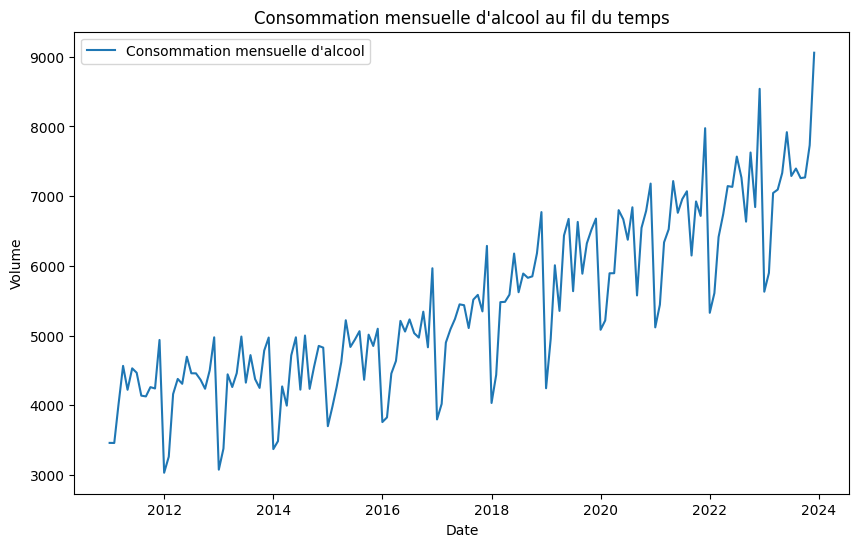

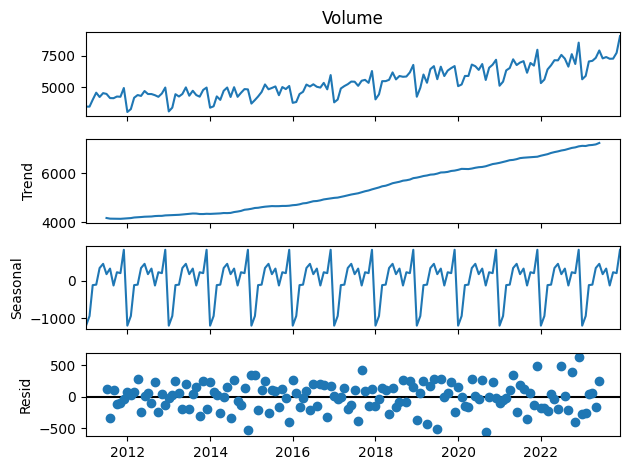

In [126]:
import statsmodels.api as sm

# Convertir l'index de période en DatetimeIndex
alcohol.index = alcohol.index.to_timestamp()

# Visualiser la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(alcohol.index, alcohol["Volume"], label="Consommation mensuelle d'alcool")
plt.title("Consommation mensuelle d'alcool au fil du temps")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

# Décomposer la série temporelle pour analyser la tendance et la saisonnalité
decomposition = sm.tsa.seasonal_decompose(alcohol["Volume"], model='additive')
fig = decomposition.plot()
plt.show()

# Évaluer s'il existe une tendance et déterminer le type de modèle pour la saisonnalité
# Sur la base du graphique de décomposition et de votre analyse, vous pouvez déterminer s'il existe une tendance et si la composante saisonnière suit un modèle additif ou multiplicatif.


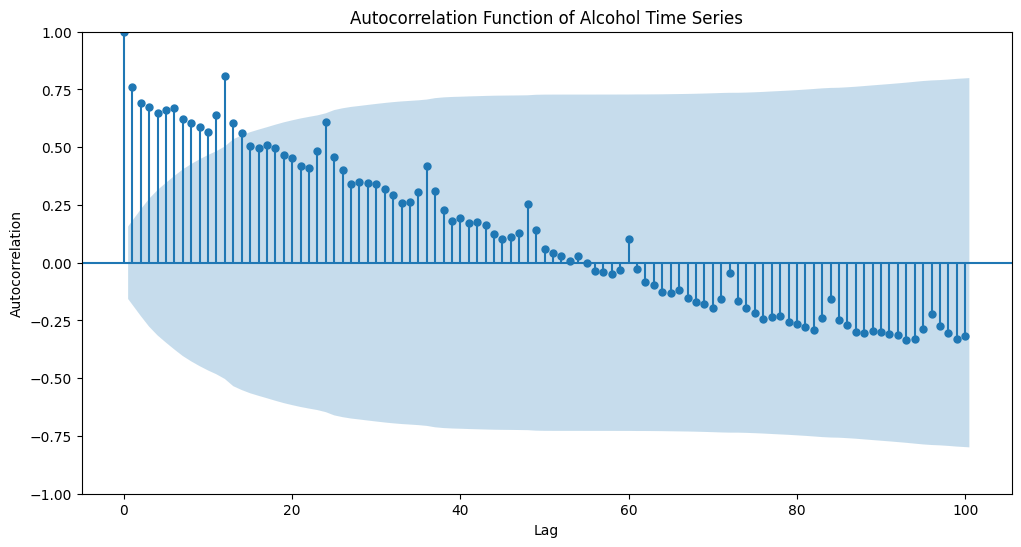

In [127]:
# Plot the autocorrelation function
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(alcohol['Volume'], lags=100, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function of Alcohol Time Series')
plt.show()

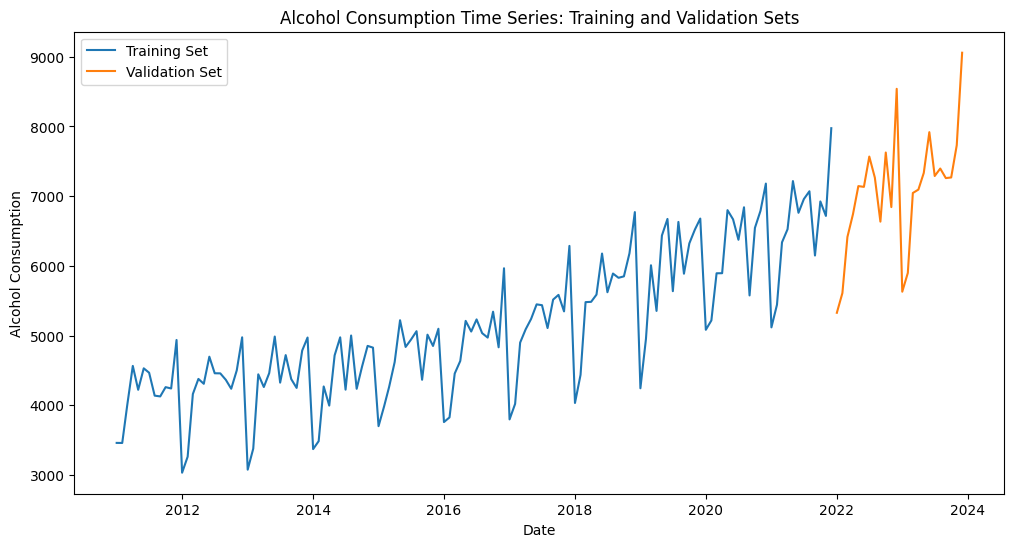

In [128]:
# Split the time series into training and validation sets
train_set = alcohol.iloc[:-24]  # Exclude the last 24 points
validation_set = alcohol.iloc[-24:]  # Last 24 points

# Optionally, you can visualize the training and validation sets
plt.figure(figsize=(12, 6))
plt.plot(train_set.index, train_set['Volume'], label='Training Set')
plt.plot(validation_set.index, validation_set['Volume'], label='Validation Set')
plt.xlabel('Date')
plt.ylabel('Alcohol Consumption')
plt.title('Alcohol Consumption Time Series: Training and Validation Sets')
plt.legend()
plt.show()

In [129]:
# We will now apply the Triple Exponential Smoothing algorithm to the training data (additive model first)
# As you can see below, we need to indicate the length of the period in 'seasonal_periods', and 
# we specify sesaonal = 'add' for an additive model (trend will always be 'add' for us)

tes_model = ExponentialSmoothing(train_set, initialization_method='estimated',seasonal_periods=12, trend = 'add', seasonal = 'add').fit()
tes_model.summary()

Dep. Variable:,Volume,No. Observations:,132
Model:,ExponentialSmoothing,SSE,8102006.942
Optimized:,True,AIC,1487.276
Trend:,Additive,BIC,1533.401
Seasonal:,Additive,AICC,1493.329
Seasonal Periods:,12,Date:,"Mon, 08 Jul 2024"
Box-Cox:,False,Time:,18:47:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0758926,alpha,True
smoothing_trend,0.0751446,beta,True


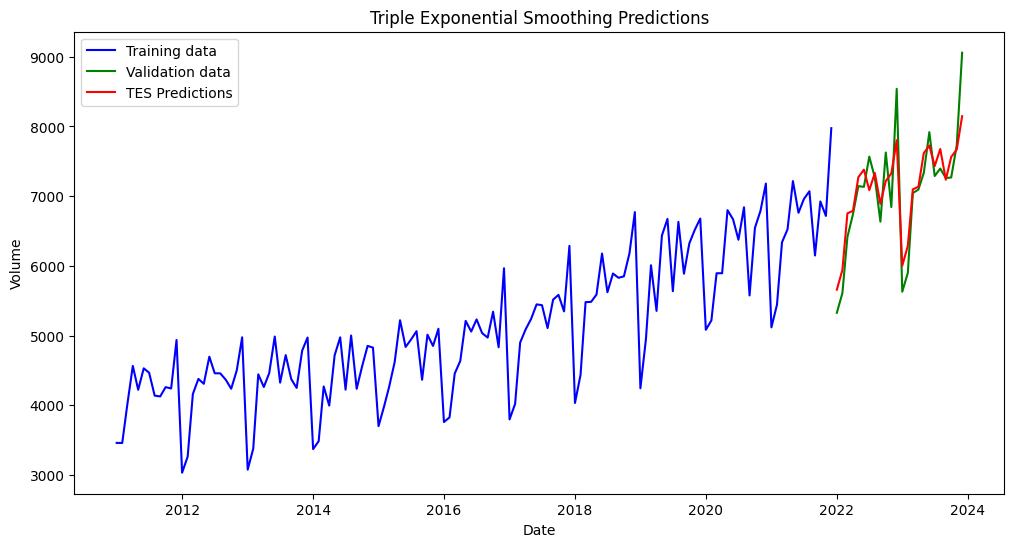

Mean Squared Error on Validation Set: 128780.43356707883


In [130]:
# Compute predictions for the entire validation set
predictions = tes_model.forecast(len(validation_set))

# Plot data and predictions
plt.figure(figsize=(12, 6))
plt.plot(train_set.index, train_set["Volume"], label='Training data', color='blue')
plt.plot(validation_set.index, validation_set["Volume"], label='Validation data', color='green')
plt.plot(validation_set.index, predictions, label='TES Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Triple Exponential Smoothing Predictions')
plt.legend()
plt.show()

# Compute squared prediction error
squared_error = (validation_set['Volume'] - predictions) ** 2
mean_squared_error = squared_error.mean()
print(f"Mean Squared Error on Validation Set: {mean_squared_error}")

In [131]:
# We will now try a model with a multiplicative seasonal composant. 
# For this, you need to specify seasonal = 'mul' in the call of the Exponenatial smoothing function : 
tes_model2 = ExponentialSmoothing(train_set, initialization_method='estimated',seasonal_periods=12, trend = 'add', seasonal = 'mul').fit()
tes_model2.summary()

Dep. Variable:,Volume,No. Observations:,132
Model:,ExponentialSmoothing,SSE,7242885.912
Optimized:,True,AIC,1472.480
Trend:,Additive,BIC,1518.605
Seasonal:,Multiplicative,AICC,1478.533
Seasonal Periods:,12,Date:,"Mon, 08 Jul 2024"
Box-Cox:,False,Time:,18:47:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1110714,alpha,True
smoothing_trend,0.0863889,beta,True


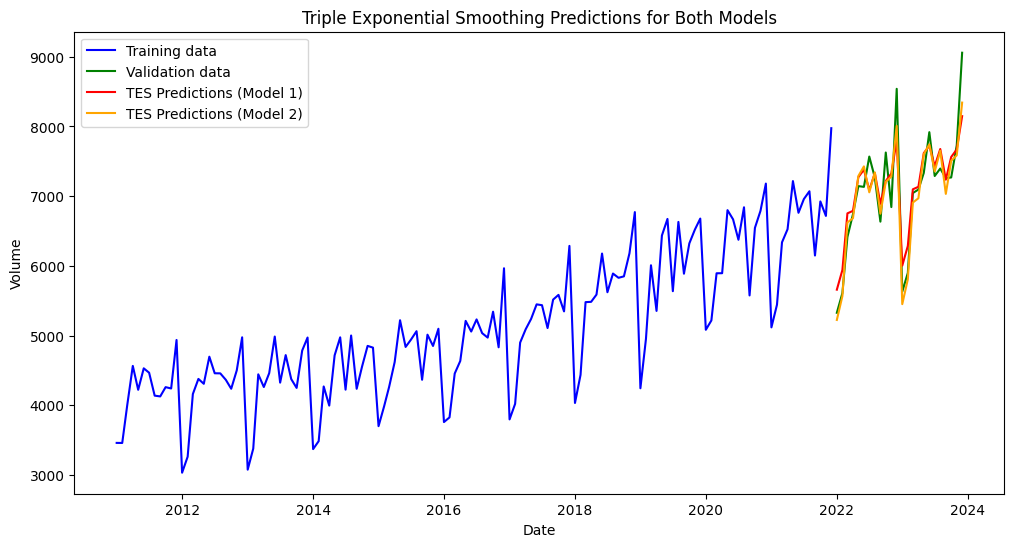

Mean Squared Error on Validation Set (Model 2): 82902.98791758106


In [132]:
# Compute predictions for the entire validation set for the second model
predictions_model2 = tes_model2.forecast(len(validation_set))

# Plot data and predictions for both models
plt.figure(figsize=(12, 6))

# Plotting for the first model
plt.plot(train_set.index, train_set["Volume"], label='Training data', color='blue')
plt.plot(validation_set.index, validation_set["Volume"], label='Validation data', color='green')
plt.plot(validation_set.index, predictions, label='TES Predictions (Model 1)', color='red')

# Plotting for the second model
plt.plot(validation_set.index, predictions_model2, label='TES Predictions (Model 2)', color='orange')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Triple Exponential Smoothing Predictions for Both Models')
plt.legend()
plt.show()

# Compute squared prediction error for the second model
squared_error_model2 = (validation_set['Volume'] - predictions_model2) ** 2
mean_squared_error_model2 = squared_error_model2.mean()
print(f"Mean Squared Error on Validation Set (Model 2): {mean_squared_error_model2}")


c:\users\nanaf\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\nanaf\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\nanaf\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\nanaf\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\nanaf\appdata\local\programs\python\python39\lib\si

Meilleur ordre du modèle AR (avec tendance) : 49
AIC (avec tendance) : 1314.2247257354
Mean Squared Error (MSE) on Validation Data (with Trend): 56510.66661006599
                            AutoReg Model Results                             
Dep. Variable:                 Volume   No. Observations:                  144
Model:                    AutoReg(49)   Log Likelihood                -606.112
Method:               Conditional MLE   S.D. of innovations            142.764
Date:                Mon, 08 Jul 2024   AIC                           1314.225
Time:                        18:47:32   BIC                           1444.472
Sample:                    02-01-2015   HQIC                          1366.855
                         - 12-01-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9401    205.212      0.024    

c:\users\nanaf\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
c:\users\nanaf\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\nanaf\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_inde

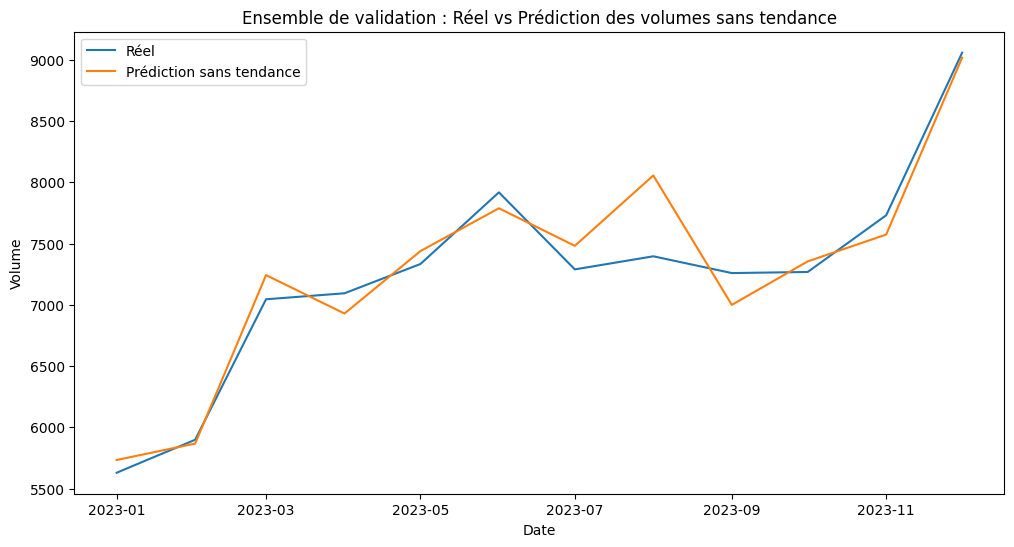

Erreur quadratique moyenne (MSE) sur les données de validation (sans tendance) : 56661.80432917944
Erreur quadratique moyenne racine (RMSE) sur les données de validation (sans tendance) : 238.03740111415146


In [133]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Charger les données
alcohol = pd.read_csv("./Alcohol.csv", sep=";", skiprows=1, names=["Date", "Volume"])
alcohol["Date"] = pd.to_datetime(alcohol["Date"], format="%d/%m/%Y")
alcohol.set_index("Date", inplace=True)

# Diviser les données en ensembles d'entraînement et de validation
train_set = alcohol[:'2022-12']
validation_set = alcohol['2023-01':]

# Essayer différents modèles AR avec tendance et sélectionner le meilleur ordre
best_aic_trend = np.inf
best_order_trend = None
best_model_trend = None

for p in range(1, 50):  # Essayer des ordres de 1 à 10
    model_trend = sm.tsa.AutoReg(train_set['Volume'], lags=p, trend='c').fit()
    aic_trend = model_trend.aic
    if aic_trend < best_aic_trend:
        best_aic_trend = aic_trend
        best_order_trend = p
        best_model_trend = model_trend

print("Meilleur ordre du modèle AR (avec tendance) :", best_order_trend)
print("AIC (avec tendance) :", best_aic_trend)
predictions_with_trend = best_model_trend.predict(start=len(train_set), end=len(train_set) + len(validation_set) - 1)

mse_with_trend = mean_squared_error(validation_set['Volume'], predictions_with_trend)
print("Mean Squared Error (MSE) on Validation Data (with Trend):", mse_with_trend)
print(best_model_trend.summary())

# Utiliser le meilleur ordre du modèle AR (sans tendance) pour ajuster le modèle aux données d'entraînement
best_model_no_trend = sm.tsa.AutoReg(train_set['Volume'], lags=best_order_trend, trend='n').fit()

# Prédire l'ensemble des données de validation en utilisant le modèle AR sans tendance
predictions_no_trend = best_model_no_trend.predict(start=len(train_set), end=len(train_set) + len(validation_set) - 1)

# Tracer les prédictions sans tendance par rapport aux données de validation réelles
plt.figure(figsize=(12, 6))
plt.plot(validation_set.index, validation_set['Volume'], label='Réel')
plt.plot(validation_set.index, predictions_no_trend, label='Prédiction sans tendance')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Ensemble de validation : Réel vs Prédiction des volumes sans tendance')
plt.legend()
plt.show()

# Calculer l'erreur sur les données de validation pour le modèle AR sans tendance
mse_no_trend = mean_squared_error(validation_set['Volume'], predictions_no_trend)
rmse_no_trend = np.sqrt(mse_no_trend)
print("Erreur quadratique moyenne (MSE) sur les données de validation (sans tendance) :", mse_no_trend)
print("Erreur quadratique moyenne racine (RMSE) sur les données de validation (sans tendance) :", rmse_no_trend)


In [134]:
# Utiliser le meilleur modèle AR (avec tendance) pour ajuster les données historiques jusqu'en décembre 2023
best_model_with_trend = sm.tsa.AutoReg(alcohol['Volume'], lags=best_order_trend, trend='c').fit()

# Prédire les valeurs de janvier 2024 à décembre 2025
start_date = '2024-01-01'
end_date = '2025-12-01'
predictions_with_trend = best_model_with_trend.predict(start=start_date, end=end_date)

# Stocker les prédictions dans un fichier .txt avec une prédiction par ligne
with open('predictions_alcohol.txt', 'w') as file:
    for date, prediction in zip(predictions_with_trend.index, predictions_with_trend.values):
        file.write(f"{date.strftime('%d/%m/%Y')} {prediction}\n")

print("Prédictions sauvegardées avec succès dans predictions_alcohol.txt")

Prédictions sauvegardées avec succès dans predictions_alcohol.txt


c:\users\nanaf\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\nanaf\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [135]:
# Lire le contenu du fichier predictions_alcohol.txt
with open('predictions_alcohol.txt', 'r') as file:
    predictions_content = file.read()

# Afficher le contenu
print(predictions_content)

01/01/2024 5756.07866832759
01/02/2024 6514.645730868486
01/03/2024 7547.4721554245425
01/04/2024 7365.20078429272
01/05/2024 7953.357668648679
01/06/2024 8527.290771537344
01/07/2024 7428.855423963694
01/08/2024 8310.530397659815
01/09/2024 7498.301811581782
01/10/2024 7507.689248883033
01/11/2024 8358.513132789494
01/12/2024 9119.764788802831
01/01/2025 6099.39686830459
01/02/2025 6842.844116946933
01/03/2025 7641.6434075025145
01/04/2025 7810.303551463841
01/05/2025 8642.226283817254
01/06/2025 8668.08336011527
01/07/2025 8040.719197438298
01/08/2025 8978.303080437057
01/09/2025 7526.884369395648
01/10/2025 8294.23716548344
01/11/2025 8832.800705085367
01/12/2025 9701.337591640444

